In [ ]:
from math import *
import numpy as np
from scipy.optimize import fsolve
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

print("Sucess!")
#print("Max drag force = %0.4f [N]" % torque)

Sucess!


In [ ]:
# Q1 Resistive Circuits (V=IR)

# --- Circuit A ---
print("--- Circuit A ---")
V = 120 #[V]
R_eq = (1/(6E3+2E3)+1/8E3)**(-1) + 1E3
print("R_eq = %0.4f [kΩ]" % (R_eq/1000))
I = V/R_eq
print("I = %0.4f [A]" % I)
V_a = V - I*1E3
print("V_a = %0.4f [V]" % V_a)
V_x = 6E3/(2E3+6E3) * V_a
print("V_x = %0.4f [V]" % V_x)
P_Source = V * I
print("P_Source = %0.4f [W]" % P_Source)
P_Load = V_x**2/6E3
print("P_Load = %0.4f [W]" % P_Load)

# --- Circuit B ---
print("\n--- Circuit B ---")
V = 300
R_eq = 2E3 + 2E3 + 6E3
print("R_eq = %0.4f [kΩ]" % (R_eq/1000))
I = V/R_eq
print("I = %0.4f [A]" % I)
V_x = I*6E3
print("V_x = %0.4f [V]" % V_x)
P_Source = V * I
print("P_Source = %0.4f [W]" % P_Source)
P_Load = I**2 * 6E3
print("P_Load = %0.4f [W]" % P_Load)

--- Circuit A ---
R_eq = 5.0000 [kΩ]
I = 0.0240 [A]
V_a = 96.0000 [V]
V_x = 72.0000 [V]
P_Source = 2.8800 [W]
P_Load = 0.8640 [W]

--- Circuit B ---
R_eq = 10.0000 [kΩ]
I = 0.0300 [A]
V_x = 180.0000 [V]
P_Source = 9.0000 [W]
P_Load = 5.4000 [W]


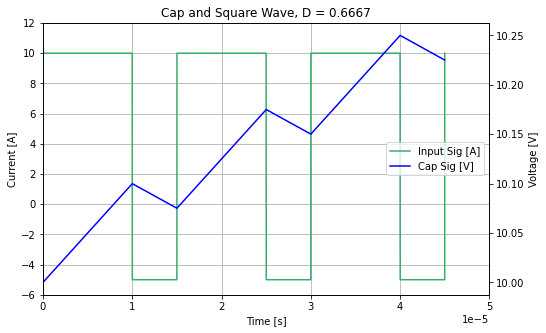

In [ ]:
# Q2 Voltage in a capacitor

from scipy import signal

# Setup the plot
fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches
ax2 = host.twinx()

# Square wave variables
sampling = int(100E3) #[Hz]
D = 2/3
period = 15E-6 #[s]
num_periods = 3
frequency = 1/period #[Hz]
omega = 2*pi*frequency #[rad/s]

# Plot the square wave
# t = np.linspace(0, num_periods*period, sampling, endpoint=False)
t = np.linspace(0, num_periods*period, sampling)
signal = (15) * ((1/2) * (signal.square(omega * t, duty=D) + 1)) - 5
series1, = host.plot(t, signal, 'xkcd:seaweed green', label='Input Sig [A]')

voltages = np.zeros(len(signal), dtype=float)
C = 1E-3 #[F]
voltages[0] = 10

# Now integrate it using rh riemann sum
for i, volts in enumerate(voltages[:-1]):
    voltages[i+1] = voltages[i] + (1/C) * (t[i+1] - t[i]) * signal[i+1]

series2, = ax2.plot(t, voltages, 'b-', label='Cap Sig [V]')

# Adjust plot parameters
titlestr = "Cap and Square Wave, D = " + '{0:.4f}'.format(D)
plt.title(titlestr)
host.set_xlabel("Time [s]")
host.set_xlim([0, num_periods*period + 5E-6])
host.set_ylabel("Current [A]")
host.set_ylim([-6, 12])
host.grid(b=True, which='both', axis='both')
# plot legend
lns = [series1, series2]
host.legend(handles=lns, loc='right')

# Set up ax2 parameters
ax2.set_ylabel("Voltage [V]")
#ax2.grid(True)
#ax2.set_ylim([10, 12])

plt.show()

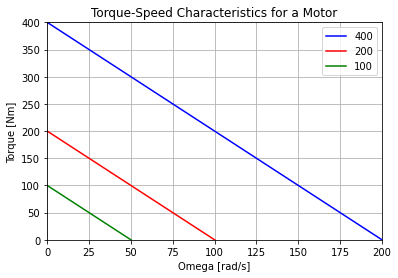

In [ ]:
# Q4-2
# Superimpose the torque-speed plots

V = [400, 200, 100]
colours = ['b-', 'r-', 'g-']
omega = np.linspace(0, 256, 1000)
torque = np.zeros(1000)

for outindex in range(len(V)):

  for i, w in enumerate(omega):
      torque[i] = V[outindex] - 2*w

  plt.plot(omega, torque, colours[outindex], label=V[outindex])

plt.title("Torque-Speed Characteristics for a Motor")
plt.xlabel("Omega [rad/s]")
plt.ylabel("Torque [Nm]")
plt.ylim([0, 400])
plt.xlim([0, 200])
plt.grid(True)
plt.legend()
plt.show()